<a href="https://colab.research.google.com/github/Bryce-Hiraoka/cs_237/blob/ps04/pa04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS237 - Fall 2023 - Programming Assignment 04
## Due Thursday, February 16th at midnight (1 minute after 11:59pm) in Gradescope

You will implement a variation to the Monty Hall Problem in this programming assignment.

Submit your programming assignment by filling in this notebook with your solutions. Write all your code in this file, **be sure to click on Runtime-> Run all and verify that everything works as you intended**, and then upload the `ipynb` file to Gradescope.

### Notes:
* You can reuse the code provided in this and previous homework descriptions.
* You are obliged to go to "Runtime->Run All" and execute all cells before downloading the .ipynb file.
* Do your best to follow these principles:
 * **Correctness**: your code should be free of error. Debug it as many times as possible.
 * **Clarity**: write high-quality comments, functions, and variable naming
 * **Simplicity**: write your solution in the assigned cells, don't create new cells or reorder them. 
 * **Completeness**: the solution to all problems must be included in one Python notebook, and no function should be blank.
 * **Authenticity**, since we assume that you posted your code written by you.


## Warmup - The original Monty Hall Problem

In Lecture 4, we saw how to simulate the Monty Hall Problem in Python. Here, we use a different approach by splitting the Monty Hall Problem into phases:

1. the host hides goats and car behind doors;

2. the player chooses a door;

3. the host reveals a door;

4. the player stays or switches to a different door;

5. checking whether the player's final choice contains a car.

We will use a list to represent the state of each door: whether a door contains `"hidden car"`, `"hidden goat"` or `"revealed goat"`.

For example, if the list is `["hidden car", "hidden goat", "hidden goat"]`, then only the first door contains a car and all other doors contain a goat.

In [1]:
# Warmup: Monty Hall Problem

import random

print(random.random())
print("Cool! random() is working!\n")


# PHASE 1 - host hides goats and cars behind doors

doors = ["hidden goat"] * 3
random_index = random.randint(0, 2)
doors[random_index] = "hidden car"
print("The doors are", doors)
print()


# PHASE 2 - player picks a door

player_choice = random.randint(0, 2)
print("Player chose door", player_choice)
print()


# PHASE 3 - host reveals a door

host_available_choices = [index for index in range(3) if doors[index] == "hidden goat" and index != player_choice]
host_choice = random.choice(host_available_choices)
doors[host_choice] = "revealed goat"
print("Host revealed door", host_choice)
print("The doors are", doors)
print()

# PHASE 4 - player stays or switches

player_available_choices = [index for index in range(3) if doors[index] != "revealed goat" and index != player_choice]
player_new_choice = random.choice(player_available_choices)
print("Player's new choice is", player_new_choice)
print()

# PHASE 5 - checking player's final choice

print("The player chose a door that contains a", doors[player_new_choice])



0.8270667506446506
Cool! random() is working!

The doors are ['hidden goat', 'hidden car', 'hidden goat']

Player chose door 1

Host revealed door 0
The doors are ['revealed goat', 'hidden car', 'hidden goat']

Player's new choice is 2

The player chose a door that contains a hidden goat


## Monty Hall Problem with multiple revealed doors

We want to generalize the Monty Hall problem so that there are now `n` doors and only one of them contains a car. Moreover, the host now reveals `k` doors that contain a goat; again, the host should not reveal the player's door. The player always switches to one of the remaining doors uniformly at random. You can assume `1 <= k <= n - 2`.

* Complete the function `single_trial()` so that it simulates the generalized Monty Hall problem and returns `True` if the player wins the car and `False` otherwise. 

* Use `multiple_trials()` to empirically estimate the probability of winning the car when `n = 10` and `k = 4`.

* Finally, create a bar chart that shows the probability of winning a car for k` = 1, ..., 48` when `n = 50`.

You can refer to the Warmup code or the code from Lecture 4, but you should not do any printing inside `single_trial()`. You should not modify the function `multiple_trials()`.

In [19]:
import random

# Input: n is the number of doors, k is the number of revealed doors
# Output: Boolean value True if the player wins the car and False otherwise
def single_trial(n, k):
    # assigns a list of length n with values hidden goats to the varible doors
    doors = ['hidden goat'] * n
    # assigns a random integer from 0 to n-1 to a varible has_cars
    # this represents the index of where the car is
    has_car = random.randint(0, n-1)
    # assigns the value of doors at index has_car to be hidden car
    doors[has_car] = 'hidden car'
    # assigns a random integer from 0 to n-1 which represents the index of the door the player has selected
    player_door = random.randint(0, n-1)
    # creates a list of indices from doors list that are not the player door and equal to hidden goat
    host_available_choices = [index for index in range(n) if doors[index] == "hidden goat" and index != player_door]
    # for loop to do the process k time bc k doors are revealed
    for i in range(k):
      # assigns a random value from the host_available_choices list to a varible choice
      choice = random.choice(host_available_choices)
      # changed the value of doors at index choice to revealed goat
      doors[choice] = 'revealed goat'
      # removes the choice from the choice list
      host_available_choices.remove(choice)
    # creates a list with the indices that are still available to choose (not equal to reveled goat/ not the player door)
    player_available_choices = [index for index in range(n) if doors[index] != "revealed goat" and index != player_door]
    # assigns a random value from players availble choices to a varible player_new_choice
    player_new_choice = random.choice(player_available_choices)
    # checks if the new choice is equal to the index where the car is
    if player_new_choice == has_car:
      # return True if it is
      return True
    else:
      # returns False if it is not
      return False


# Input: n is the number of doors, k is the number of revealed doors, num_trials is the number of simulation trials
# Output: the number of trials in which the player wins the car
def multiple_trials(n, k, num_trials=1000):
    num_wins = 0
    for _ in range(num_trials):
        if single_trial(n, k):
            num_wins += 1
    return num_wins / num_trials

print("When n=10 and k=4, the probability of winning a car is", multiple_trials(10, 4))

# You can print and test other values of n and k here


When n=10 and k=4, the probability of winning a car is 0.168


## Visualization

Create a bar chart that shows the probability of winning a car for `k = 1, ..., 48` when `n = 50`.

Remember to give your bar chart an appropriate title and label each axis.

0.979


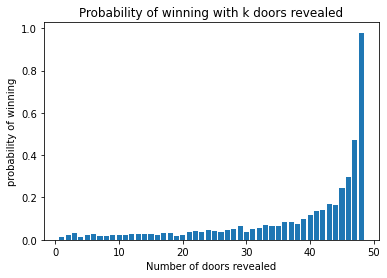

In [20]:
from matplotlib import pyplot
# assigns x_values to a list with numbers from 1-48 representing k
x_values = list(range(1,49))
# creates a new empty list
y_values = []
# for loop that runs from 1 to 48
for i in range(1,49):
  # assigns the return value from multiple_trials to variable prob
  prob = multiple_trials(50, i)
  if i == 48:
    print(prob)
  # append prob to the end of y_values
  y_values.append(prob)
# x and y values from graph
pyplot.bar(x_values, y_values)
# title
pyplot.title("Probability of winning with k doors revealed")
# x axis
pyplot.xlabel("Number of doors revealed")
# y axis
pyplot.ylabel("probability of winning")
#show
pyplot.show()

